In [1]:
from tslearn.datasets import UCR_UEA_datasets
import numpy as np 
import torch 
import seaborn as sns
import sklearn
from ClassificationModels.LSTM_T import LSTM
from ClassificationModels.CNN_T import ResNetBaseline, get_all_preds, fit, UCRDataset


In [ ]:
#Load Data 
dataset='GunPoint'
X_train,y_train, X_test, y_test=UCR_UEA_datasets().load_dataset(dataset)
train_x=X_train.reshape(-1,X_train.shape[-1],X_train.shape[-2])
test_x=X_test.reshape(-1,X_train.shape[-1],X_train.shape[-2])
train_y = y_train
test_y=y_test
enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(np.vstack((train_y.reshape(-1,1),test_y.reshape(-1,1))))
#pickle.dump(enc1,open(f'../../ClassificationModels/models/{dataset}/OneHotEncoder.pkl','wb'))

train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1)) 

print(train_y)
#Load Model 
n_pred_classes =len(np.unique(train_y))
train_dataset = UCRDataset(train_x.astype(np.float64),train_y.astype(np.int64))
test_dataset = UCRDataset(test_x.astype(np.float64),test_y.astype(np.int64))
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=16,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1,shuffle=False)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
model =ResNetBaseline(in_channels=1, num_pred_classes=n_pred_classes)
model.load_state_dict(torch.load(f'../../ClassificationModels/models/{dataset}/ResNet'))

model.eval()

ResNetBaseline(
  (layers): Sequential(
    (0): ResNetBlock(
      (layers): Sequential(
        (0): ConvBlock(
          (layers): Sequential(
            (0): Conv1dSamePadding(1, 64, kernel_size=(8,), stride=(1,))
            (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
          )
        )
        (1): ConvBlock(
          (layers): Sequential(
            (0): Conv1dSamePadding(64, 64, kernel_size=(5,), stride=(1,))
            (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
          )
        )
        (2): ConvBlock(
          (layers): Sequential(
            (0): Conv1dSamePadding(64, 64, kernel_size=(3,), stride=(1,))
            (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
          )
        )
      )
      (residual): Sequential(
        (0): Conv1dSamePadding(1, 64, kernel_size=(1,)

In [ ]:
item = np.array([test_x[0,:,:]],dtype=np.float64)
label =0

In [ ]:
from TSInterpret.InterpretabilityModels.Saliency.TSR import TSR
int_mod=TSR(model, train_x.shape[-1],train_x.shape[-2], method='FO', \
    mode='feat')
exp= int_mod.explain(item,labels=label,TSR =True)

2023-06-06 14:33:43.700665: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 14:33:44.440109: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-06 14:33:44.440178: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-06 14:33:44.440185: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

FC [[0.1]]
TC [[0.00000000e+00 1.50882983e-04 1.17962052e-04 7.29728835e-05
  1.84861559e-04 3.23939562e-04 2.74724432e-04 1.35886594e-04
  4.09848967e-05 7.64367862e-06 4.86793792e-06 4.20286861e-06
  2.69260703e-06 1.64881768e-06 2.20766065e-06 1.19158253e-06
  1.08073764e-06 1.20081960e-06 3.55165490e-06 6.88623856e-06
  1.40957747e-05 2.10743840e-05 3.12628765e-05 3.60938661e-05
  4.54094551e-05 4.77510533e-05 4.81297734e-05 4.49522199e-05
  4.70952211e-05 4.70213245e-05 4.78018572e-05 4.38114413e-05
  4.49429829e-05 5.55656178e-05 7.14718590e-05 1.00277674e-04
  2.04661227e-04 6.61162036e-04 7.98655880e-04 1.10745588e-03
  1.41699484e-03 1.98049330e-03 2.45278950e-03 3.27609913e-03
  4.03598701e-03 5.18378581e-03 6.11787105e-03 6.71277093e-03
  6.54356622e-03 1.00688493e-02 1.95347670e-02 2.23871708e-02
  2.52682973e-02 3.62979546e-02 4.51270685e-02 4.36114217e-02
  4.78917940e-02 5.46737460e-02 5.89880137e-02 5.26410586e-02
  4.68926105e-02 4.42347903e-02 3.63246590e-02 3.1534053

(1, 150)
(1, 1, 150)
NOT Time mode


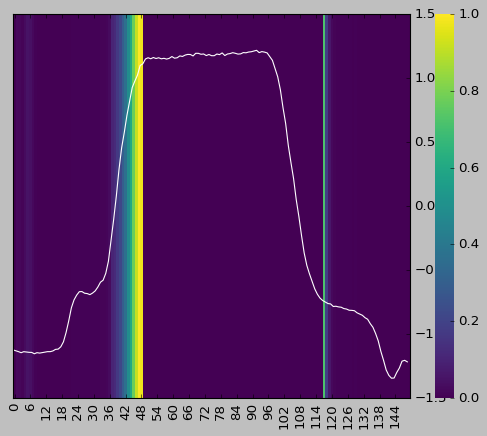

In [ ]:
print(exp.shape)
print(np.array([test_x[0,:,:]]).shape)
int_mod.plot(np.array([test_x[0,:,:]]),exp, figsize=(30,30))